In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats

data40 = pd.read_csv('data40.csv')
# data40 = data40.reset_index()
# # print(data40)
# print(data40.iloc[2:, 20:1])
total_data = data40.iloc[2:, 19:-1]
total_data = total_data.reset_index(drop=True)# reset index
# print(total_data)
# total_data = total_data.reset_index(drop=False) # reset index
total_data = total_data.astype(dtype='int64') # To int


# df = pd.melt(total_data, id_vars='')

total_data_np = total_data.values
total_data_np = total_data_np.astype(np.int64)
print(total_data_np)

[[4 3 5 ... 3 5 4]
 [2 4 5 ... 2 2 1]
 [3 1 4 ... 1 2 4]
 ...
 [1 1 5 ... 1 1 5]
 [1 1 6 ... 1 1 3]
 [1 1 6 ... 2 1 3]]


In [93]:
print('The rotation is:')
print(' 1 - 怒り - anger,\n 2 - 恐怖 - fear,\n 3 - 幸福 - happiness, \n 4 - 悲しみ - sadness, \n 5 - 驚き - surprise,\n 6 - 嫌悪 - disgust, \n 7 - 中性 - neutral')

The rotation is:
 1 - 怒り - anger,
 2 - 恐怖 - fear,
 3 - 幸福 - happiness, 
 4 - 悲しみ - sadness, 
 5 - 驚き - surprise,
 6 - 嫌悪 - disgust, 
 7 - 中性 - neutral


In [ ]:
print(total_data_np.mean(axis=0))

In [3]:
practiceHA_data = total_data.iloc[:, 0:7].copy()

In [ ]:
print(anger_only_data)

# Namba normal, Namba hot, BOA 0

In [32]:
def multiple_analysis_1_with_fig(id):
    emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
    def get_emo_num(name):
        if name.lower() == 'anger':
            return 0
        elif name.lower() == 'disgust':
            return 5
        elif name.lower() == 'fear':
            return 1
        elif name.lower() in ["Happiness", "happiness"]:
            return 2
        elif name.lower() in ["Sadness", "sadness"]:
            return 3
        elif name.lower() in ["Surprise", "surprise"]:
            return 4
        elif name.lower() in ["Neutral", "neutral"]:
            return 6
            
        
        
    for i in range(7):
        if i != id:
            continue
        current_emo = emo_names[i]
        print('current emo is ', current_emo)
        temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#         print(temp_data.head())
        temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(3)]]
#         print(temp_data_with_temp_rating.head())
        temp_data_with_temp_rating = temp_data_with_temp_rating.reset_index(drop=False)
#         print(list(temp_data_with_temp_rating.columns)[:])
        df = pd.melt(temp_data_with_temp_rating, id_vars='index', value_vars=list(temp_data_with_temp_rating.columns)[1:],
                     var_name='stimulus', value_name='rating')
#         print(df)
        # one-way repeated measures ANOVA
        # the within subject model 
        import pingouin as pg
        res = pg.rm_anova(dv='rating', within='stimulus', subject='index', data=df,detailed=True)
        print()
        print(res)
        print()

        from statsmodels.stats.multicomp import MultiComparison
        #Then, do the multiple testing in Tukey's test
        mc = MultiComparison(df['rating'], df['stimulus'])
#         print(mc.tukeyhsd().summary())
#         # Show the group names
#         print(mc.groupsunique)

        # Instead of the Tukey's test, we can do pairwise t-test
        # First, with the "Holm" correction
        rtp = mc.allpairtest(stats.ttest_rel, method='Holm')
        print('Multiple Comparison Using Holm method')
        print((rtp[0]))

In [33]:
multiple_analysis_1_with_fig(0)

current emo is  anger

     Source          SS  DF         MS          F     p-unc      np2       eps
0  stimulus   45.016667   2  22.508333  12.278704  0.000023  0.23945  0.983413
1     Error  142.983333  78   1.833120        NaN       NaN      NaN       NaN

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
      group1            group2       stat   pval  pval_corr reject
------------------------------------------------------------------
    BOA Anger 0_1 Namba hot Anger_1 3.2434 0.0024    0.0048   True
    BOA Anger 0_1 Namba normal An_1  4.606    0.0    0.0001   True
Namba hot Anger_1 Namba normal An_1 1.7455 0.0888    0.0888  False
------------------------------------------------------------------


In [34]:
multiple_analysis_1_with_fig(1)

current emo is  disgust

     Source          SS  DF         MS          F         p-unc       np2  \
0  stimulus   66.516667   2  33.258333  21.237413  4.332449e-08  0.352562   
1     Error  122.150000  78   1.566026        NaN           NaN       NaN   

        eps  
0  0.990457  
1       NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
       group1              group2        stat   pval  pval_corr reject
----------------------------------------------------------------------
    BOA Disgust 0_6 Namba hot Disgust_6 4.3054 0.0001    0.0002   True
    BOA Disgust 0_6   Namba normal Di_6  6.655    0.0       0.0   True
Namba hot Disgust_6   Namba normal Di_6 1.8623 0.0701    0.0701  False
----------------------------------------------------------------------


In [40]:
multiple_analysis_1_with_fig(2)

current emo is  fear

     Source         SS  DF        MS         F     p-unc      np2      eps
0  stimulus   1.316667   2  0.658333  0.611188  0.545284  0.01543  0.99347
1     Error  84.016667  78  1.077137       NaN       NaN      NaN      NaN

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
    group1           group2       stat   pval  pval_corr reject
---------------------------------------------------------------
  BOA Fear 0_2    Namba hot fe_2 0.3217 0.7494    0.9091  False
  BOA Fear 0_2 Namba normal Fe_2 1.0437  0.303    0.9091  False
Namba hot fe_2 Namba normal Fe_2 0.7838 0.4379    0.9091  False
---------------------------------------------------------------


In [36]:
multiple_analysis_1_with_fig(3)

current emo is  happiness

     Source          SS  DF         MS         F     p-unc       np2       eps
0  stimulus   25.716667   2  12.858333  9.094303  0.000282  0.189093  0.980042
1     Error  110.283333  78   1.413889       NaN       NaN       NaN       NaN

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
      group1            group2        stat   pval  pval_corr reject
-------------------------------------------------------------------
BOA Happiness 0_3    Namba hot ha_3 -3.0508 0.0041    0.0082   True
BOA Happiness 0_3 Namba normal Ha_3 -3.9632 0.0003    0.0009   True
   Namba hot ha_3 Namba normal Ha_3 -0.9119 0.3674    0.3674  False
-------------------------------------------------------------------


In [41]:
multiple_analysis_1_with_fig(4)

current emo is  sadness

     Source          SS  DF         MS          F         p-unc       np2  \
0  stimulus   90.216667   2  45.108333  32.049036  6.930272e-11  0.451083   
1     Error  109.783333  78   1.407479        NaN           NaN       NaN   

        eps  
0  0.916929  
1       NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
     group1           group2        stat   pval  pval_corr reject
-----------------------------------------------------------------
BOA Sadness 0_4    Namba hot sa_4  7.2858    0.0       0.0   True
BOA Sadness 0_4 Namba normal Sa_4  3.4889 0.0012    0.0012   True
 Namba hot sa_4 Namba normal Sa_4 -4.7231    0.0    0.0001   True
-----------------------------------------------------------------


In [42]:
multiple_analysis_1_with_fig(5)

current emo is  surprise

     Source          SS  DF          MS           F         p-unc  \
0  stimulus  365.150000   2  182.575000  132.452488  8.315949e-26   
1     Error  107.516667  78    1.378419         NaN           NaN   

      p-GG-corr       np2       eps sphericity   W-spher   p-spher  
0  1.790617e-22  0.772532  0.857275      False  0.833513  0.031429  
1           NaN       NaN       NaN        NaN       NaN       NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
     group1            group2         stat   pval  pval_corr reject
-------------------------------------------------------------------
BOA Surprise 0_5    Namba hot Sur_5 -2.3948 0.0215    0.0215   True
BOA Surprise 0_5 Namba normal Sur_5 11.2819    0.0       0.0   True
 Namba hot Sur_5 Namba normal Sur_5 14.7293    0.0       0.0   True
-------------------------------------------------------------------


In [44]:
multiple_analysis_1_with_fig(6)

current emo is  neutral

     Source     SS  DF        MS         F     p-unc  p-GG-corr      np2  \
0  stimulus    7.8   2  3.900000  1.998686  0.142394   0.152201  0.04875   
1     Error  152.2  78  1.951282       NaN       NaN        NaN      NaN   

        eps sphericity   W-spher  p-spher  
0  0.808224      False  0.762719  0.00582  
1       NaN        NaN       NaN      NaN  

Multiple Comparison Using Holm method
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
     group1           group2         stat   pval  pval_corr reject
------------------------------------------------------------------
BOA Neutral 0_7    Namba hot Neu_7 -2.6234 0.0124    0.0371   True
BOA Neutral 0_7 Namba normal Neu_7 -0.4117 0.6828    0.6828  False
Namba hot Neu_7 Namba normal Neu_7  1.3717  0.178     0.356  False
------------------------------------------------------------------


     index           stimulus  rating
0        0  Namba normal An_1       4
1        1  Namba normal An_1       5
2        2  Namba normal An_1       5
3        3  Namba normal An_1       1
4        4  Namba normal An_1       6
..     ...                ...     ...
115     35      BOA Anger 0_1       5
116     36      BOA Anger 0_1       5
117     37      BOA Anger 0_1       6
118     38      BOA Anger 0_1       6
119     39      BOA Anger 0_1       7

[120 rows x 3 columns]
                   count   mean       std  min   25%  50%   75%  max
Namba normal An_1   40.0  4.000  1.585188  1.0  3.00  4.0  5.00  7.0
Namba hot Anger_1   40.0  4.500  1.739437  1.0  3.75  5.0  6.00  7.0
BOA Anger 0_1       40.0  5.475  1.584986  1.0  5.00  6.0  6.25  7.0
     Source          SS  DF         MS          F     p-unc      np2       eps
0  stimulus   45.016667   2  22.508333  12.278704  0.000023  0.23945  0.983413
1     Error  142.983333  78   1.833120        NaN       NaN      NaN       NaN
       

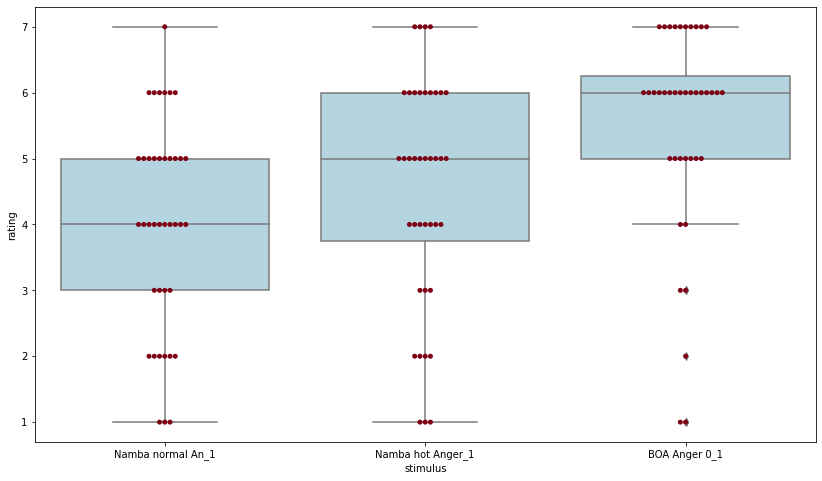

In [130]:
# anger total
anger_data = total_data.iloc[:, 14:14+7*7].copy()
# print(anger_data)
anger_only_data = anger_data.iloc[:, [0, 7, 14]]
anger_data_with_an_rating = anger_only_data.reset_index(drop=False)
# print(anger_data_with_an_rating)
# melt from the wide format to long format
anger_only_df = pd.melt(anger_data_with_an_rating, id_vars='index', value_vars=list(anger_data_with_an_rating.columns)[1:],
             var_name='stimulus', value_name='rating')
print(anger_only_df)
summary = anger_only_data.describe()
summary = summary.transpose()
print(summary.head())

plt.figure(figsize=(14, 8))
ax2 = sns.boxplot(x="stimulus", y="rating", data=anger_only_df, color='lightblue')
ax2 = sns.swarmplot(x="stimulus", y="rating", data=anger_only_df, color='#7d0013')

# print('mean of anger:')
# print(anger_only_data.mean(axis=0))

# anger_only_data.to_csv('anger_only_data.csv')

# ---------------------
# incorrect in my data!!!!!!
# This is one-way between subjects ANOVA
# from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm
# model = ols('rating~C(stimulus)',data=anger_only_df).fit()
# anova_table = anova_lm(model, typ = 2)
# print(anova_table)
# ---------------------


# one-way repeated measures ANOVA
# the within subject model 
import pingouin as pg
res = pg.rm_anova(dv='rating', within='stimulus', subject='index', data=anger_only_df,detailed=True)
print(res)

from statsmodels.stats.multicomp import MultiComparison
groups = ['stimulus']
#Then, do the multiple testing
mc = MultiComparison(anger_only_df['rating'], anger_only_df['stimulus'])
print(mc.tukeyhsd().summary())
# Show the group names
print(mc.groupsunique)

# Instead of the Tukey's test, we can do pairwise t-test
# First, with the "Holm" correction
rtp = mc.allpairtest(stats.ttest_rel, method='Holm')
print((rtp[0]))

# and then with the Bonferroni correction
# NOTICE: Holm always gives greater statistical power than Bonferroni. So let's use Holm instead.
# print((mc.allpairtest(stats.ttest_rel, method='b')[0]))

# # Done this way, the variance is calculated at each comparison.
# # If you want the joint variance across all samples, you have to 
# # use a few tricks:(http://jpktd.blogspot.co.at/2013/03/multiple-comparison-and-tukey-hsd-or_25.html)
# res2 = pairwise_tukeyhsd(dta2['StressReduction'], dta2['Treatment'])
# studentized_mean = res2.meandiffs
# studentized_variance = res2.variance

# t_stat = (studentized_mean / studentized_variance) / np.sqrt(2)
# dof = len(dta2) - len(mod.groupsunique)
# my_pvalues = stats.t.sf(np.abs(t_stat), dof) * 2  # two-sided

# # Now with the Bonferroni correction
# from statsmodels.stats.multitest import multipletests
# res_b = multipletests(my_pvalues, method='b')

# Anger - plot a bar chart

['Namba normal An_1', 'Namba hot Anger_1', 'BOA Anger 0_1', 'BOA Anger 3_1', 'BOA Anger 5_1', 'BOA Anger 8_1', 'BOA Anger 9_1']
     index           stimulus  rating
0        0  Namba normal An_1       4
1        1  Namba normal An_1       5
2        2  Namba normal An_1       5
3        3  Namba normal An_1       1
4        4  Namba normal An_1       6
..     ...                ...     ...
275     35      BOA Anger 9_1       4
276     36      BOA Anger 9_1       5
277     37      BOA Anger 9_1       1
278     38      BOA Anger 9_1       4
279     39      BOA Anger 9_1       7

[280 rows x 3 columns]


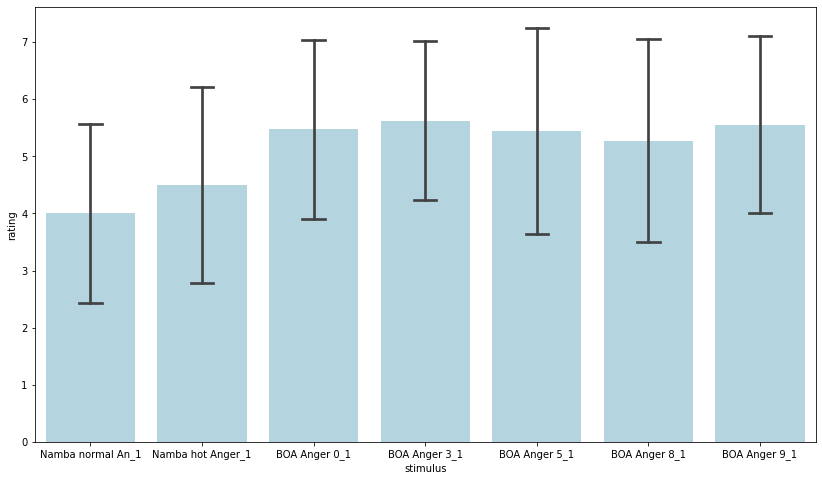

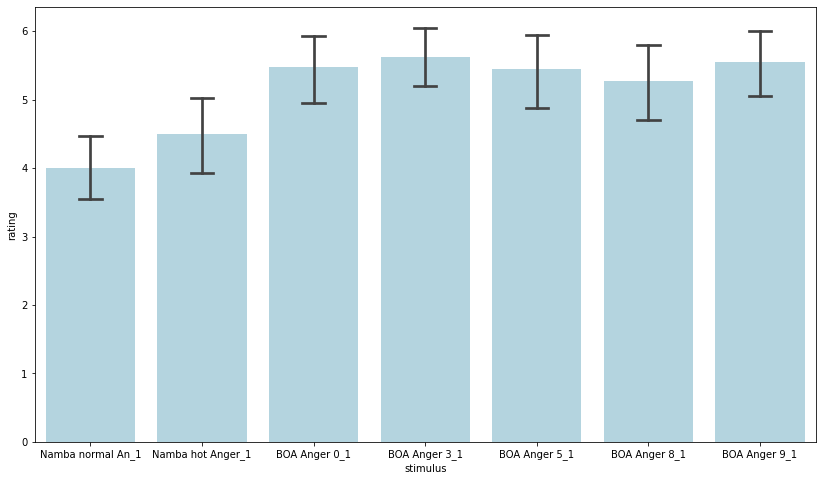

In [116]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# total_data
anger_data = total_data.iloc[:, 14:14+7*7].copy()
anger_data_with_an_rating = anger_data.iloc[:,[ 7 * x for x in range(7)]]
# print(anger_data_with_an_rating)
anger_data_with_an_rating = anger_data_with_an_rating.reset_index(drop=False)
print(list(anger_data_with_an_rating.columns)[1:])
df = pd.melt(anger_data_with_an_rating, id_vars='index', value_vars=list(anger_data_with_an_rating.columns)[1:],
             var_name='stimulus', value_name='rating')
print(df)

# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')

plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, capsize=.2, color='lightblue')

# Disgust & the rest

In [52]:
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
print(emo_names)

['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']


In [ ]:
#Then, do the multiple testing
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['rating'], df['stimulus'])
print(mc.tukeyhsd().summary())
# Show the group names
print(mc.groupsunique)

# Instead of the Tukey's test, we can do pairwise t-test
# First, with the "Holm" correction
rtp = mc.allpairtest(stats.ttest_rel, method='Holm')
print((rtp[0]))

In [128]:
list(total_data.columns)
def multiple_analysis_with_fig(id):
    emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
    def get_emo_num(name):
        if name.lower() == 'anger':
            return 0
        elif name.lower() == 'disgust':
            return 5
        elif name.lower() == 'fear':
            return 1
        elif name.lower() in ["Happiness", "happiness"]:
            return 2
        elif name.lower() in ["Sadness", "sadness"]:
            return 3
        elif name.lower() in ["Surprise", "surprise"]:
            return 4
        elif name.lower() in ["Neutral", "neutral"]:
            return 6
            
        
        
    for i in range(7):
        if i != id:
            continue
        current_emo = emo_names[i]
        print('current emo is ', current_emo)
        temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#         print(temp_data)
        temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(7)]]
#         print(temp_data_with_temp_rating.iloc[:2, :2])
        temp_data_with_temp_rating = temp_data_with_temp_rating.reset_index(drop=False)
#         print(list(temp_data_with_temp_rating.columns)[:])
        df = pd.melt(temp_data_with_temp_rating, id_vars='index', value_vars=list(temp_data_with_temp_rating.columns)[1:],
                     var_name='stimulus', value_name='rating')
#         print(df)


#         # Set the figure size
        plt.figure(figsize=(14, 8))
        print('error bar means standard deviation')
#         # plot a bar chart
        ax = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')

        print('error bar means 95% confidence interval')
        plt.figure(figsize=(14, 8))
        ax2 = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, capsize=.2, color='lightblue')
        
        plt.figure(figsize=(14, 8))
        ax2 = sns.boxplot(x="stimulus", y="rating", data=df, color='lightblue')
        ax2 = sns.swarmplot(x="stimulus", y="rating", data=df, color='#7d0013')
        
        # ANOVA analysis
        # one-way repeated measures ANOVA
        # the within subject model 
        import pingouin as pg
        res = pg.rm_anova(dv='rating', within='stimulus', subject='index', data=df, detailed=True)
        print("one-way repeated measures ANOVA is:")
        print(res)
        





current emo is  anger
error bar means standard deviation
error bar means 95% confidence interval
one-way repeated measures ANOVA is:
     Source          SS   DF         MS         F         p-unc       np2  \
0  stimulus   93.500000    6  15.583333  9.046784  6.723399e-09  0.188291   
1     Error  403.071429  234   1.722527       NaN           NaN       NaN   

        eps  
0  0.895042  
1       NaN  


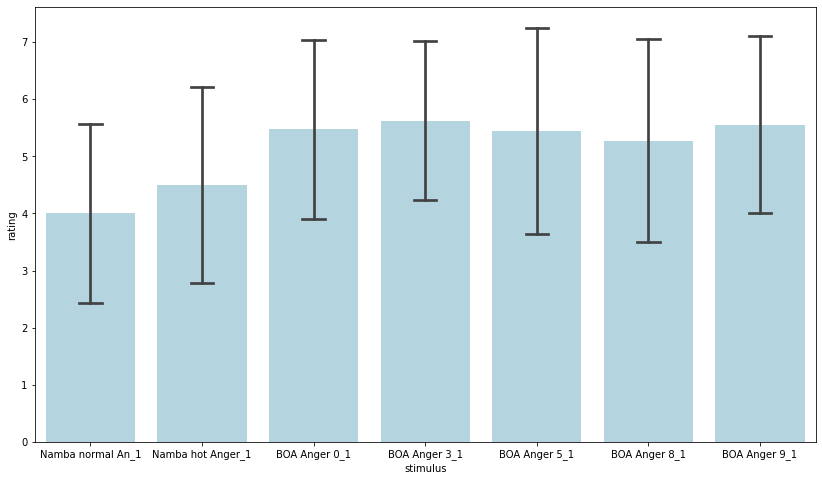

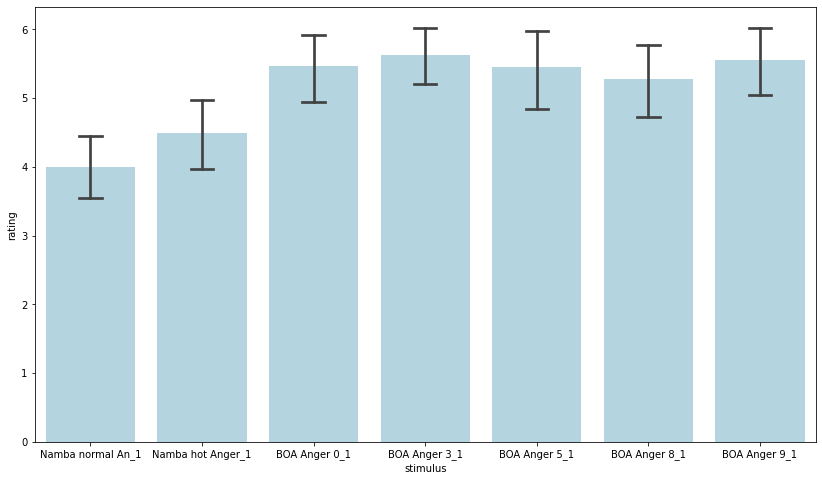

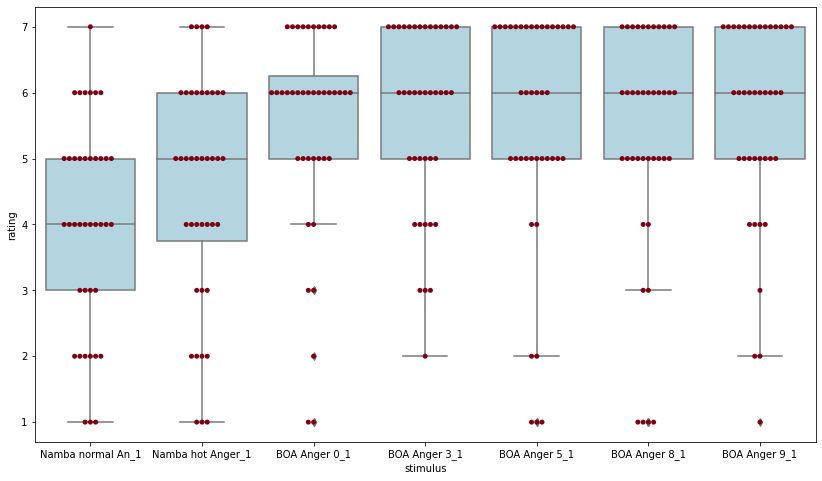

In [129]:
multiple_analysis_with_fig(0)

current emo is  disgust
error bar means standard deviation
error bar means 95% confidence interval


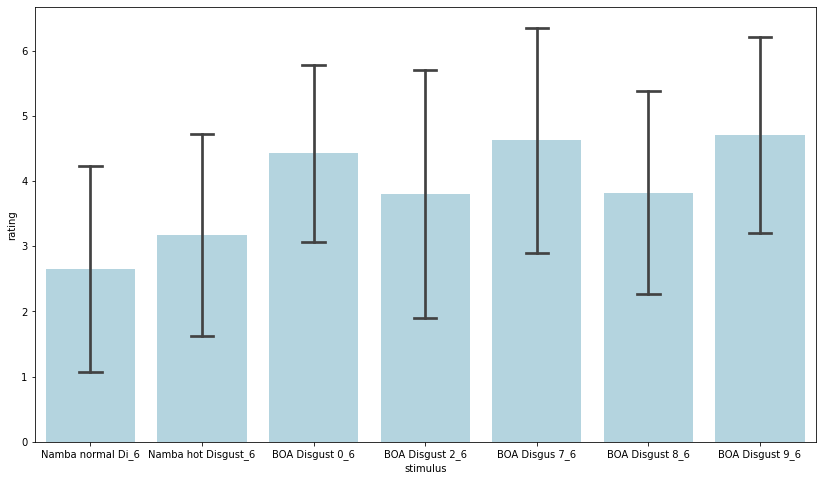

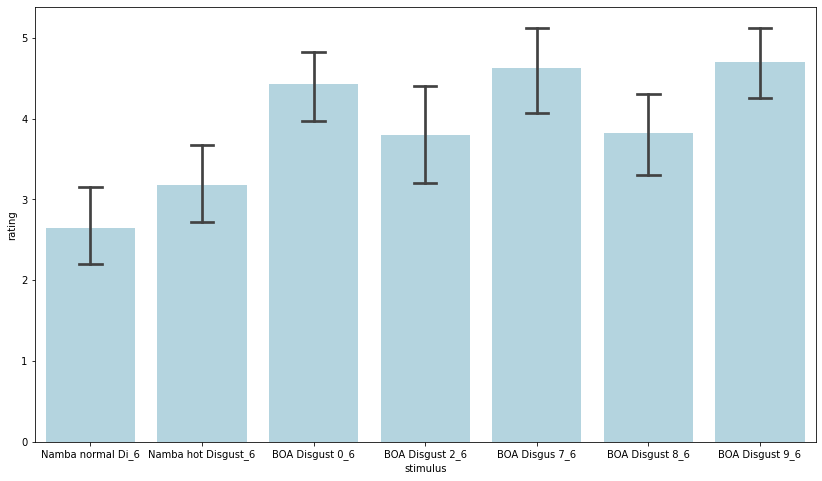

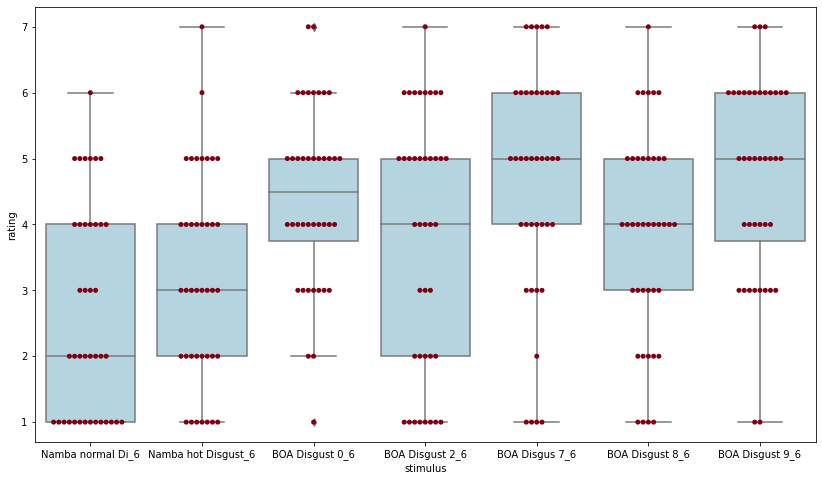

In [108]:
show_figure(1)

current emo is  fear
error bar means standard deviation
error bar means 95% confidence interval


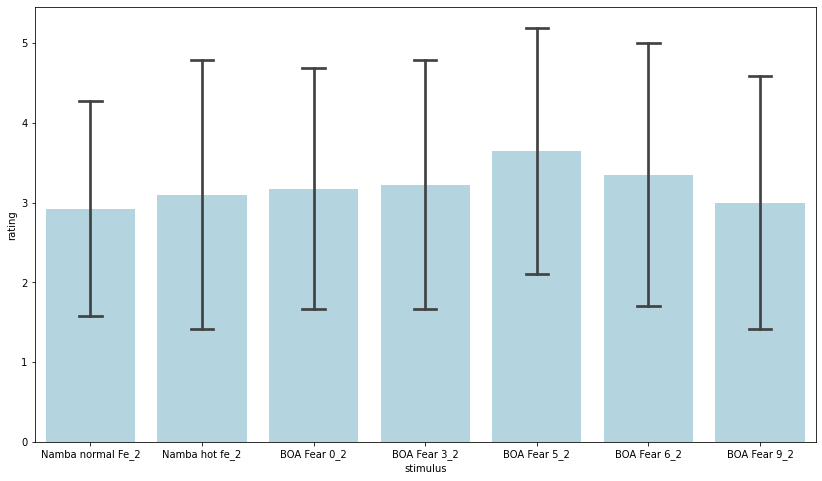

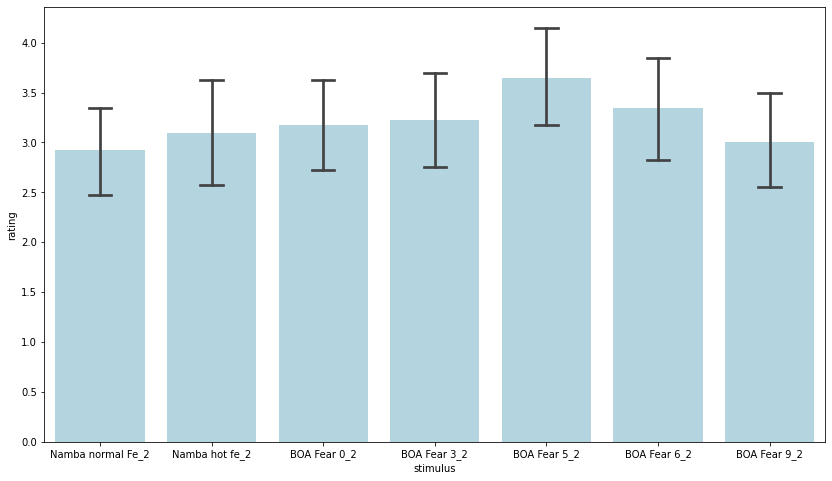

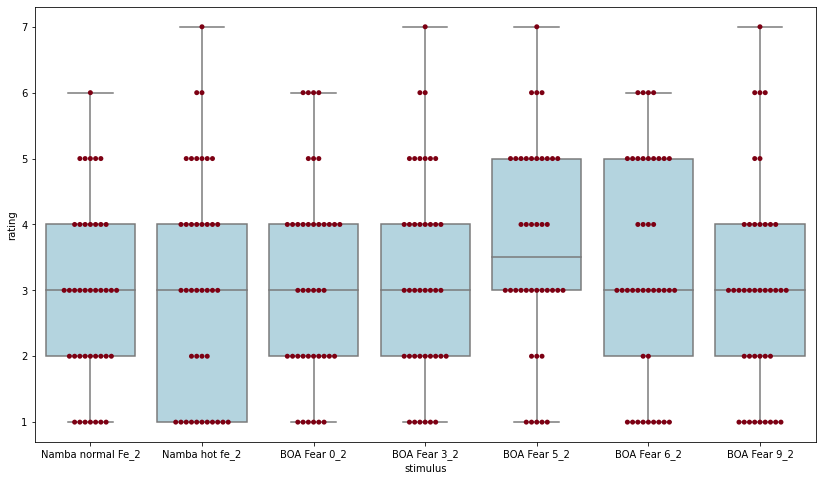

In [109]:
show_figure(2)

current emo is  happiness
error bar means standard deviation
error bar means 95% confidence interval


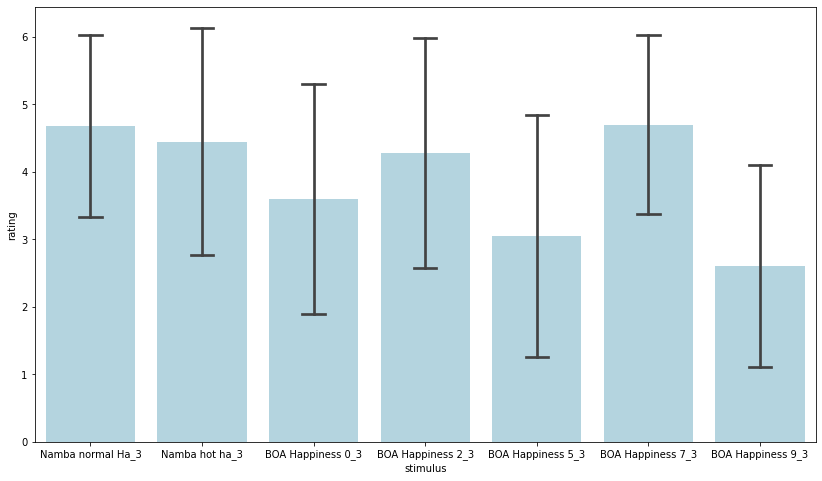

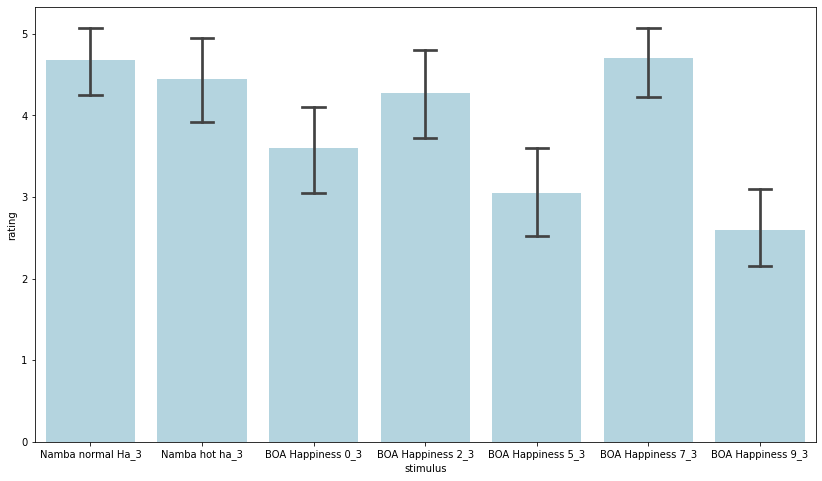

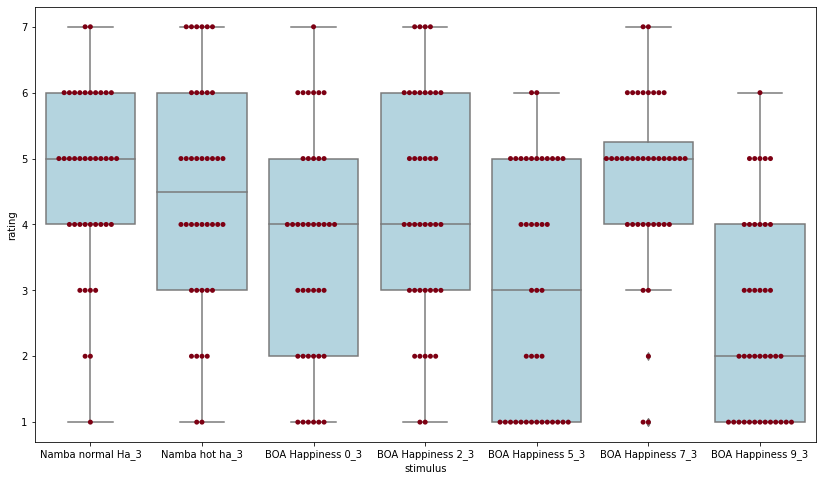

In [110]:
show_figure(3)

current emo is  sadness
error bar means standard deviation
error bar means 95% confidence interval


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


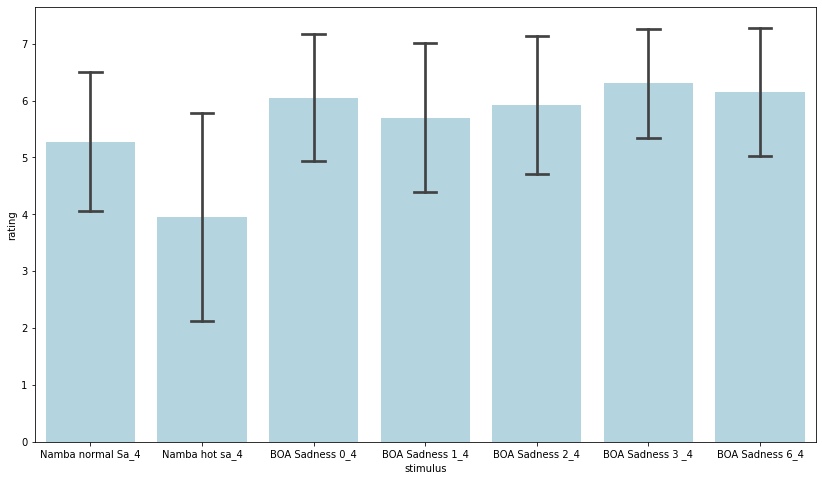

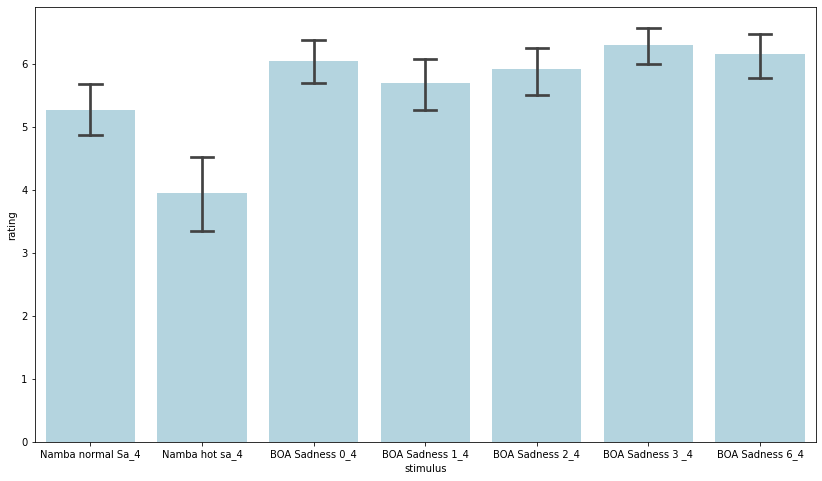

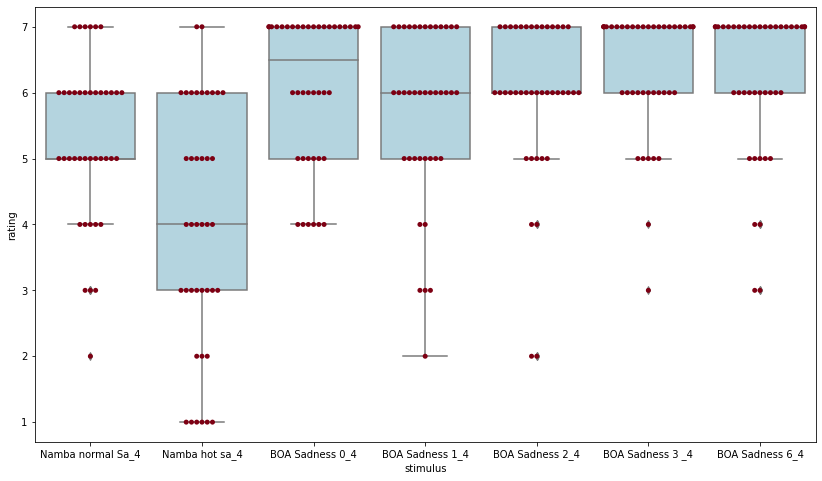

In [111]:
show_figure(4)

current emo is  surprise
error bar means standard deviation
error bar means 95% confidence interval


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


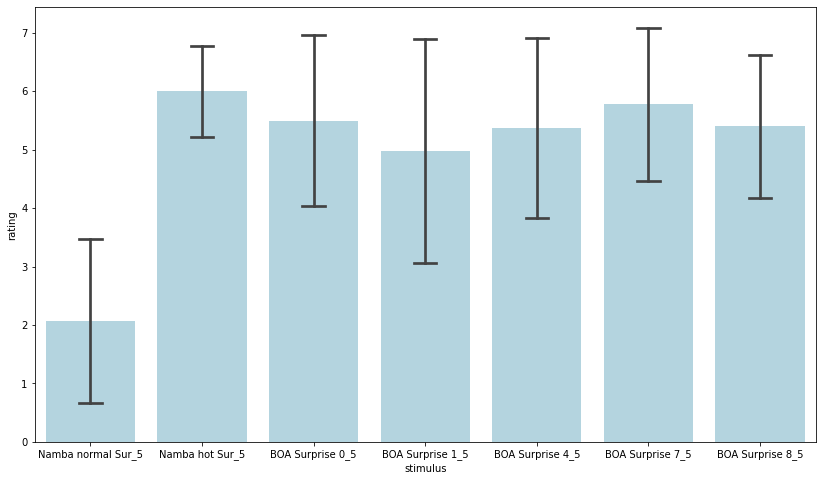

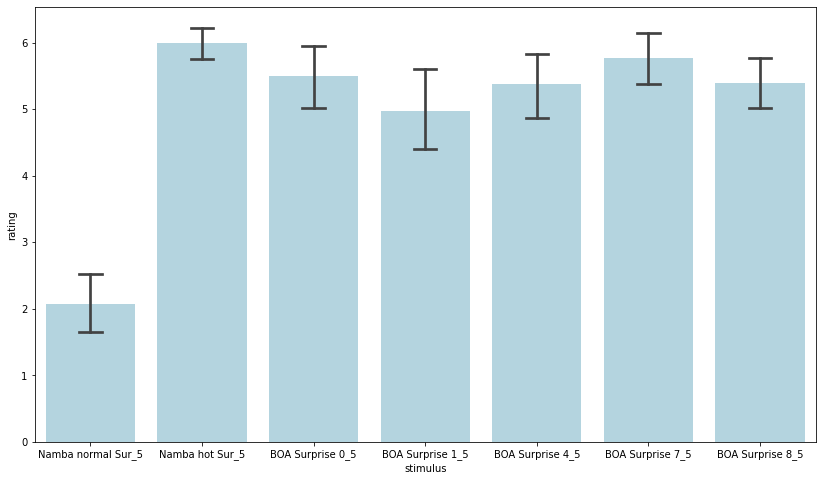

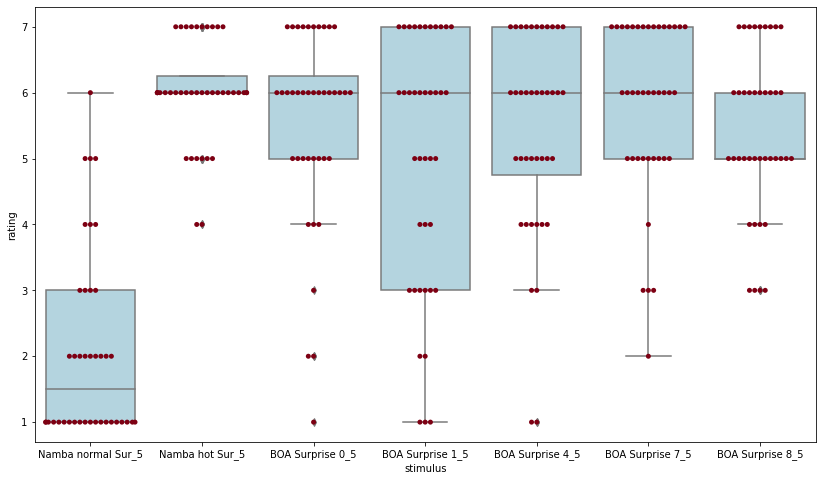

In [112]:
show_figure(5)

current emo is  neutral
error bar means standard deviation
error bar means 95% confidence interval


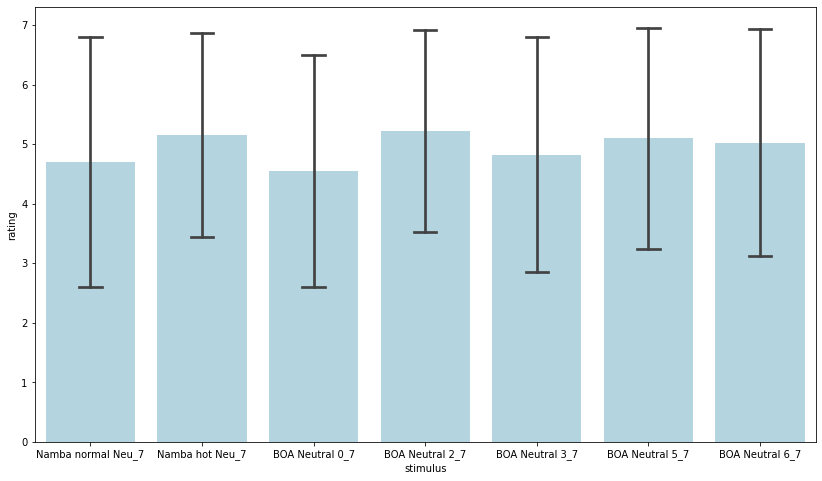

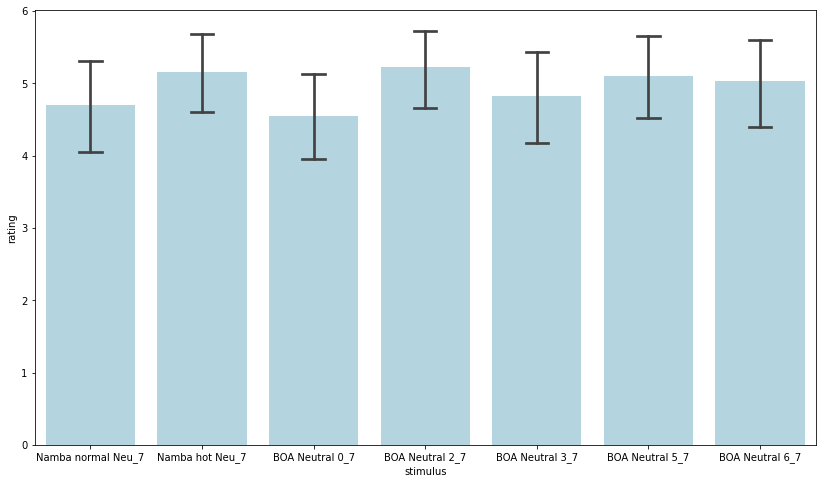

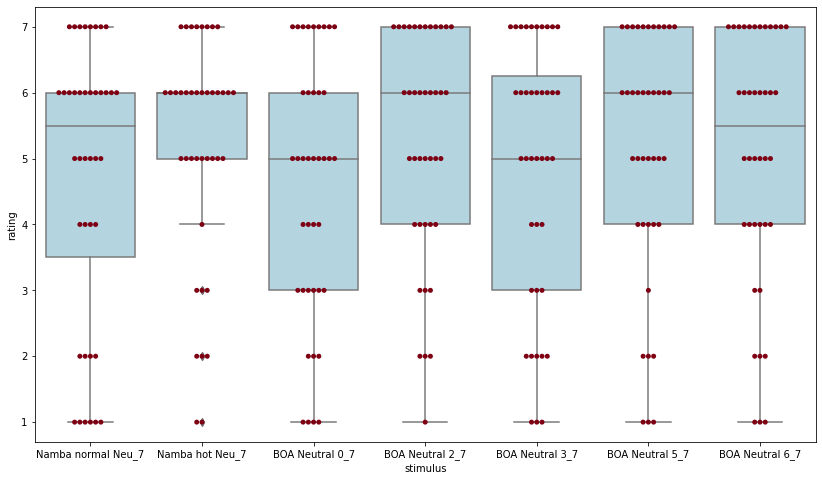

In [113]:
show_figure(6)

In [77]:
# show_figure(7)

In [ ]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# total_data

anger_data = total_data.iloc[:, 14:14+7*7].copy()
anger_data_with_an_rating = anger_data.iloc[:,[ 7 * x for x in range(7)]]
# print(anger_data_with_an_rating)
anger_data_with_an_rating = anger_data_with_an_rating.reset_index(drop=False)
print(list(anger_data_with_an_rating.columns)[1:])
df = pd.melt(anger_data_with_an_rating, id_vars='index', value_vars=list(anger_data_with_an_rating.columns)[1:],
             var_name='stimulus', value_name='rating')
print(df)

# Set the figure size
plt.figure(figsize=(14, 8))

# plot a bar chart
ax = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, ci='sd', capsize=.2, color='lightblue')

plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x="stimulus", y="rating", data=df, estimator=np.mean, capsize=.2, color='lightblue')

# oneway ANOVA

In [10]:
anger_only_data = pd.read_csv('anger_only_data.csv')
# print(anger_only_data['Namba normal An_1'])
an_arr = anger_only_data.to_numpy()
# print(an_arr)
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(an_arr[0], an_arr[1], an_arr[2])
print("ANOVA F is:", fvalue, "\np value is:", pvalue)



ANOVA F is: 1.388888888888889 
p value is: 0.2980617117584766


# T-Test

In [ ]:
stats.ttest_1samp(a=)


In [11]:
# from statsmodels.stats.anova import AnovaRM

# #perform the repeated measures ANOVA
# print(AnovaRM(data=anger_only_data, depvar=[], subject=['id'], within=['anger']).fit())

In [77]:
practiceHA_data.mean(axis=0)

PracticeHA_1    1.675
PracticeHA_2    1.275
PracticeHA_3    5.425
PracticeHA_4    1.600
PracticeHA_5    1.350
PracticeHA_6    1.575
PracticeHA_7    2.450
dtype: float64